# Tidyverse - Soccer Analytics
## Utilize tidyr, dplyr, and ggplot2 - Visualize a season of Scottish Soccer scores
* Team - Inverness Caledonian Thistle FC
* Goal - create a timeline of goals scored and goals conceded

### Download the data
* can be retrieved from https://s3.amazonaws.com/assets.datacamp.com/blog_assets/InvernessResults2017.xlsx

In [1]:
library(readxl)

library(tidyverse)

scores <- read_excel("../../Downloads/InvernessResults2017.xlsx", sheet="scores")

Warning message:
“package ‘readxl’ was built under R version 3.5.2”── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.3.1  
✔ readr   1.3.1       ✔ forcats 0.4.0  
Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”Warning message:
“package ‘tibble’ was built under R version 3.5.2”Warning message:
“package ‘tidyr’ was built under R version 3.5.2”Warning message:
“package ‘purrr’ was built under R version 3.5.2”Warning message:
“package ‘dplyr’ was built under R version 3.5.2”Warning message:
“package ‘forcats’ was built under R version 3.5.2”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### View some details of the data

In [2]:
glimpse(scores)

Observations: 36
Variables: 20
$ Outcome          <chr> "L", "L", "D", "W", "L", "L", "L", "D", "D", "W", "W…
$ Competition      <chr> "SCS", "SCS", "SCS", "SCS", "SCS", "SCS", "SCS", "SC…
$ Date             <dttm> 2017-08-05, 2017-08-12, 2017-08-19, 2017-08-26, 201…
$ Home             <dbl> 0, 5, 1, 0, 4, 1, 2, 0, 0, 0, 1, 0, 0, 4, 0, 1, 1, 2…
$ Away             <dbl> 1, 1, 1, 4, 2, 3, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 3…
$ Inverness_Status <chr> "Home", "Away", "Home", "Away", "Away", "Home", "Awa…
$ Opponent         <chr> "Dundee_United", "Dunfermline", "Greenock_Morton", "…
$ Inverness_Score  <dbl> 0, 1, 1, 4, 2, 1, 1, 0, 0, 2, 1, 0, 0, 4, 0, 1, 0, 3…
$ Inv_Goal_1       <dbl> NA, 18, 19, 27, 61, 27, 8, NA, NA, 28, 23, NA, NA, 7…
$ Inv_Goal_2       <dbl> NA, NA, NA, 32, 69, NA, NA, NA, NA, 36, NA, NA, NA, …
$ Inv_Goal_3       <dbl> NA, NA, NA, 62, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ Inv_Goal_4       <dbl> NA, NA, NA, 73, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ Inv_Goal_5       <d

* the league has 10 teams
* the season has 36 games 

### View the names of the Opponents

In [3]:
unique(scores$Opponent)

[1] "Dundee_United"      "Dunfermline"        "Greenock_Morton"   
[4] "Brechin"            "St_Mirren"          "Livingston"        
[7] "Dumbarton"          "Queen_Of_The_South" "Falkirk"

## Begin Cleaning and Working with Data
### Create a dataframe - for future purposes
* combining teams + colors

In [4]:
team <- c('Brechin', 'Dumbarton', 'Dubdee_United', 'Dunfermline', 'Falkirk', 'Greenock_Morton',
          'Inverness', 'Livingston', 'Queen_Of_The_South', 'St_Mirren')

colors <- c('#E3001B', '#F8BE02','#C6631D','#161616','midnightblue','#316891',
            '#0355AF','#C19B24','#093C71','#000000')

team_df <- tibble(team, colors)

rm(list = c("colors", "team"))

### Change capitalized column names to lowercase

In [5]:
colnames(scores) <- colnames(scores) %>% str_to_lower()

## Select function:
* Select the Date column - all columns starting with "inv" and those starting with "opp"
* also, Select Gameid column - for future purposes calculating variables

## Gather function:
* Create a column, Goals - transposing all goals columns into 1 long column
    * defined using an argument: key
* Create a column, Time - using the times of goals scored
    * alongside key, using an argument: value

In [6]:
data <- scores %>%
    select(date, starts_with("inv"), starts_with("opp"), gameid) %>%
    gather(inv_goal_1, inv_goal_2, inv_goal_3, inv_goal_4, inv_goal_5, opp_goal_1, opp_goal_2,
           opp_goal_3, opp_goal_4, opp_goal_5, key = "goal", value = "time")

### View this new dataframe

In [7]:
str(data)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	360 obs. of  8 variables:
 $ date            : POSIXct, format: "2017-08-05" "2017-08-12" ...
 $ inverness_status: chr  "Home" "Away" "Home" "Away" ...
 $ inverness_score : num  0 1 1 4 2 1 1 0 0 2 ...
 $ opponent        : chr  "Dundee_United" "Dunfermline" "Greenock_Morton" "Brechin" ...
 $ opponent_score  : num  1 5 1 0 4 3 2 0 0 0 ...
 $ gameid          : num  1 2 3 4 5 6 7 8 9 10 ...
 $ goal            : chr  "inv_goal_1" "inv_goal_1" "inv_goal_1" "inv_goal_1" ...
 $ time            : num  NA 18 19 27 61 27 8 NA NA 28 ...


### The new dataframe is 360 rows and 8 columns - the former scores dataframe was 36 rows and 20 columns
### Add a column, result - for future plotting purposes

In [8]:
data <- data %>%

mutate(result = paste(inverness_score, "-", opponent_score))

### Add a column, team - And get a cumulative count of each goal, by team, by game

In [9]:
plot_data <- data %>%
   select(date,opponent,gameid,goal,time,result,inverness_status) %>%
  mutate(team = if_else(str_sub(goal,1,1) == "i","inverness",tolower(opponent))) %>%
  group_by(gameid,team) %>%
  arrange(time) %>%
  mutate(count = 1) %>%
  ungroup() %>%
  group_by(gameid,team) %>%
  mutate(goalcount = cumsum(count)) %>%
  ungroup() %>%
  select(-count)

## To use geom_rect( ) for each goal, when plotting - requires min and max values, for both the x- and y-axis
* use lag and lead functions - from dplyr - to create these values
* a 2nd goal scored, would have a min x value (time of 1st goal scored), and max (time the 2nd goal scored) - the min y value would be 1, and max would be 2

In [10]:
plot_data <- plot_data %>%
    group_by(gameid) %>%
    arrange(gameid, time) %>%
    mutate(lag_time = lag(time), lead_time = lead(time)) %>%
    ungroup()

# replace lag NA's with 0 - and lead NA's with 90

plot_data$lag_time[is.na(plot_data$lag_time)] <- 0

plot_data$lead_time[is.na(plot_data$lead_time)] <- 90

### Select the desired columns in the desired order

In [11]:
plot_data <- plot_data %>%
    select(gameid, date, team, result, opponent, goalcount, lag_time, time, lead_time, 
           inverness_status)

### Be sure to store the rows, of games resulting in scoreless ties as well

In [12]:
goalless <- filter(plot_data, result == "0 - 0")

### Filter out - games without Time values (null) - And combine the 2 dataframes

In [13]:
scored <- filter(plot_data, result != "0 - 0") %>%
    filter(!is.na(time))

plot_data <- bind_rows(goalless, scored)

rm(list = c("goalless", "scored"))

### Plot Data

Warning message:
“Removed 40 rows containing missing values (geom_rect).”

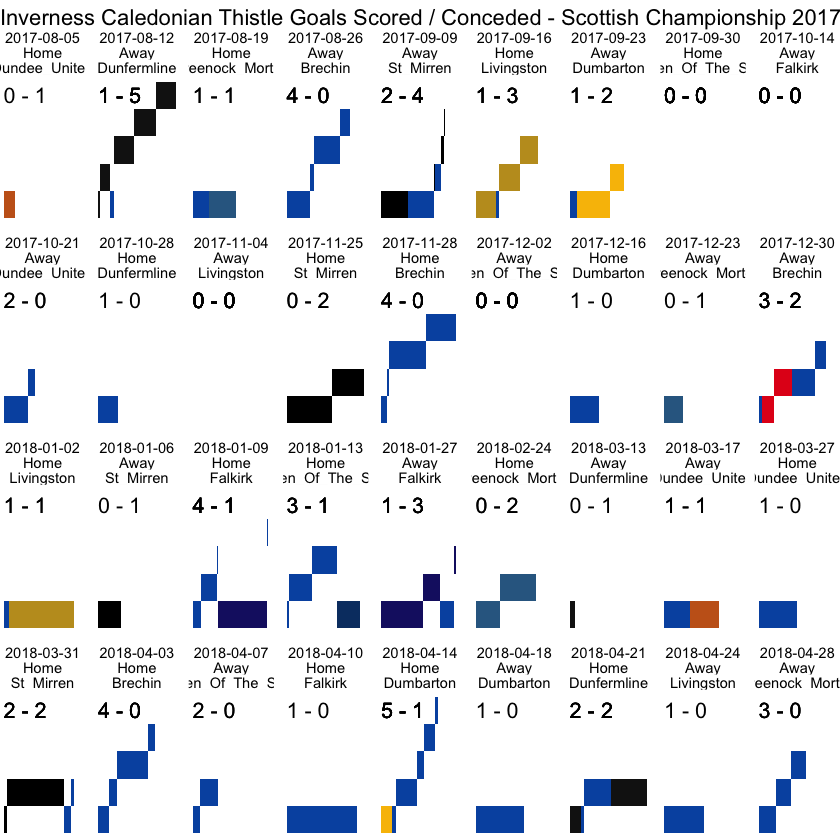

In [14]:
p <- ggplot(plot_data, aes(time, goalcount, group = opponent, fill = team)) +
    geom_rect(aes(xmin = lag_time, xmax = time, ymin = (goalcount - 1), ymax = goalcount)) +
    geom_text(aes(x = 25, y = 4.5, label = result, size = 0.5)) +
theme_void() + 
    scale_fill_manual(values = team_df$colors) +
    facet_wrap(date + inverness_status ~ opponent, ncol = 9) +
    ggtitle(label = "Inverness Caledonian Thistle Goals Scored / Conceded - Scottish Championship 2017/2018") +
    labs(x = NULL, y = NULL) + 
    theme(legend.position = "none")
print(p)

### To monitor for patterns in goal scoring or concession - Plot goals scored by 15 minute intervals

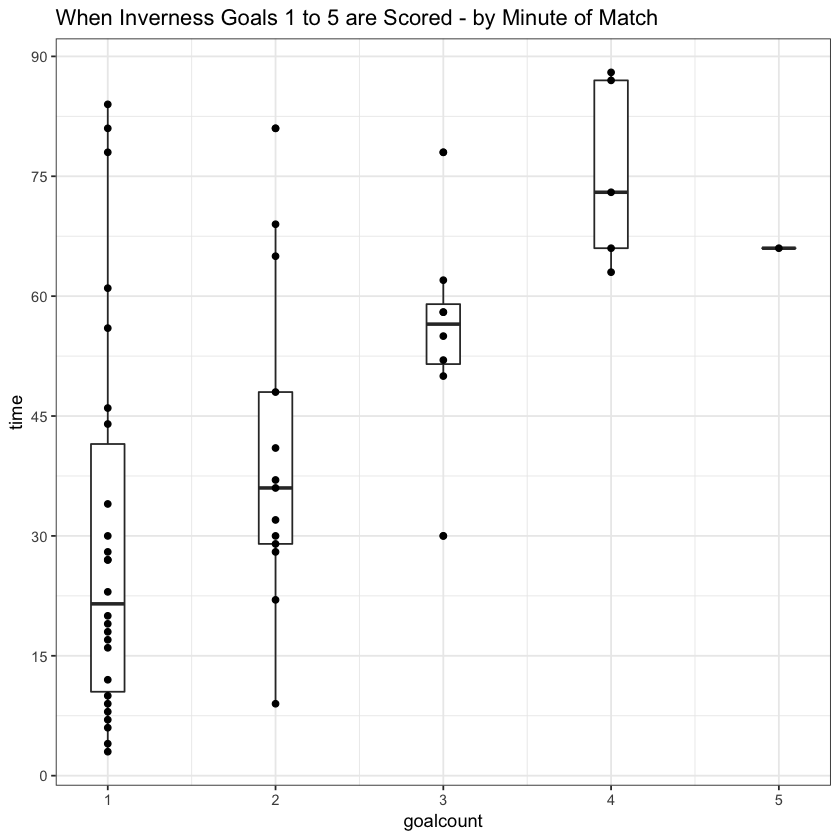

In [15]:
plot_data$cut <- cut(plot_data$time, seq(0,90,by = 15))

inv_scored <- plot_data %>%
    filter(team == "inverness", !is.na(time))
    
    ggplot(inv_scored, aes(goalcount, time, group = goalcount)) + 
    geom_boxplot(width = 0.2) +
    geom_point() +
    ggtitle(label = "When Inverness Goals 1 to 5 are Scored - by Minute of Match") +
    scale_y_continuous(breaks = seq(0,90,by = 15)) +
    theme_bw()

* it appears the team scored many goals in the 1st half (1st 45 min)

### Check for teams susceptible to giving up early goals

<ggproto object: Class ScaleDiscrete, Scale, gg>
    aesthetics: fill
    axis_order: function
    break_info: function
    break_positions: function
    breaks: waiver
    call: call
    clone: function
    dimension: function
    drop: TRUE
    expand: waiver
    get_breaks: function
    get_breaks_minor: function
    get_labels: function
    get_limits: function
    guide: legend
    is_discrete: function
    is_empty: function
    labels: waiver
    limits: NULL
    make_sec_title: function
    make_title: function
    map: function
    map_df: function
    n.breaks.cache: NULL
    na.translate: TRUE
    na.value: NA
    name: waiver
    palette: function
    palette.cache: NULL
    position: left
    range: <ggproto object: Class RangeDiscrete, Range, gg>
        range: NULL
        reset: function
        train: function
        super:  <ggproto object: Class RangeDiscrete, Range, gg>
    reset: function
    scale_name: manual
    train: function
    train_df: function
    transf

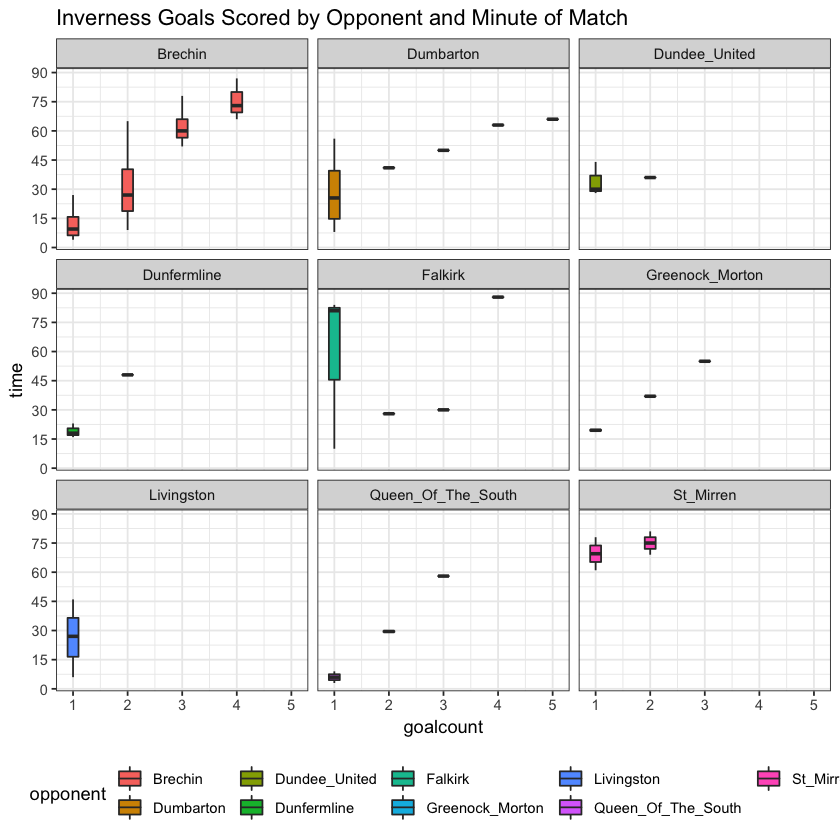

In [16]:
opposing_colors <- team_df %>% filter(team != "Inverness")

ggplot(inv_scored, aes(goalcount, time, group = goalcount, fill = opponent)) +
    geom_boxplot(width = 0.2) +
    ggtitle(label = "Inverness Goals Scored by Opponent and Minute of Match") +
    scale_y_continuous(breaks = seq(0,90,by = 15)) +
    facet_wrap(~ opponent) + 
    theme_bw() + 
    theme(legend.position = "bottom")
    scale_fill_manual(values = opposing_colors$colors)

* appears the team scored early against Brechin, Dumbarton, and Livingston

In [20]:
ggplot(opposition_score, aes(goalcount, time, group = goalcount)) +
    geom_boxplot(width = 0.2) +
    geom_point() +
        ggtitle(label = "Invernes Goals Conceded by Minute of Match") +
    scale_y_continuous(breaks = seq(0,90,by = 15)) +
    theme_bw()

ERROR: Error in ggplot(opposition_score, aes(goalcount, time, group = goalcount)): object 'opposition_score' not found


## Check for statistical differences in the Times of goals scored and conceded - using ggplot2

notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.


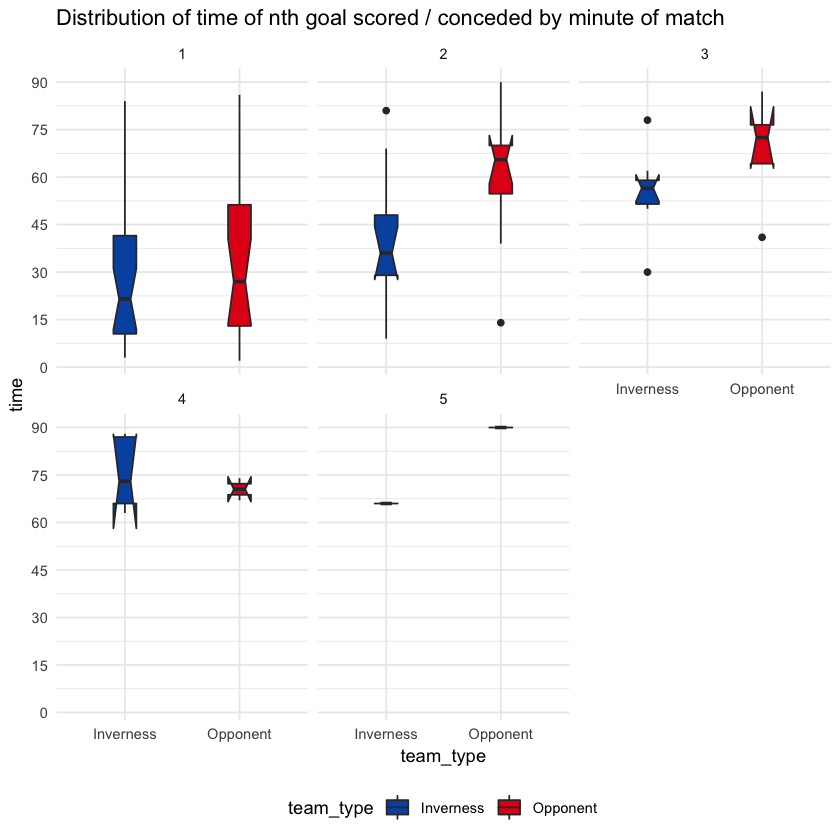

In [22]:
comparison <- plot_data %>%
  select(team, goalcount, time) %>%
  filter(!is.na(time)) %>%
  mutate(team_type = if_else(str_sub(team,1,1) == "i","Inverness","Opponent"))

ggplot(comparison,aes(team_type,time, group = team_type,fill = team_type)) +
geom_boxplot(width = 0.2, notch = TRUE) +
    ggtitle(label = "Distribution of time of nth goal scored / conceded by minute of match") +
  theme_minimal() +
  scale_y_continuous(breaks = seq(0, 90, by = 15)) +
  theme(legend.position = "bottom") +
  scale_fill_manual(values = c('#0355AF', '#E3001B')) +
  facet_wrap(vars(goalcount), ncol = 3)

* it appears Inverness is likely to score a 2nd goal, earlier than they concede a 1st

### Below is code for creating an animated gif of these results, by game - and how to save the animation

Skipping install of 'gganimate' from a github remote, the SHA1 (3151b504) has not changed since last install.
  Use `force = TRUE` to force installation
Warning message:
“Removed 40 rows containing missing values (geom_rect).”

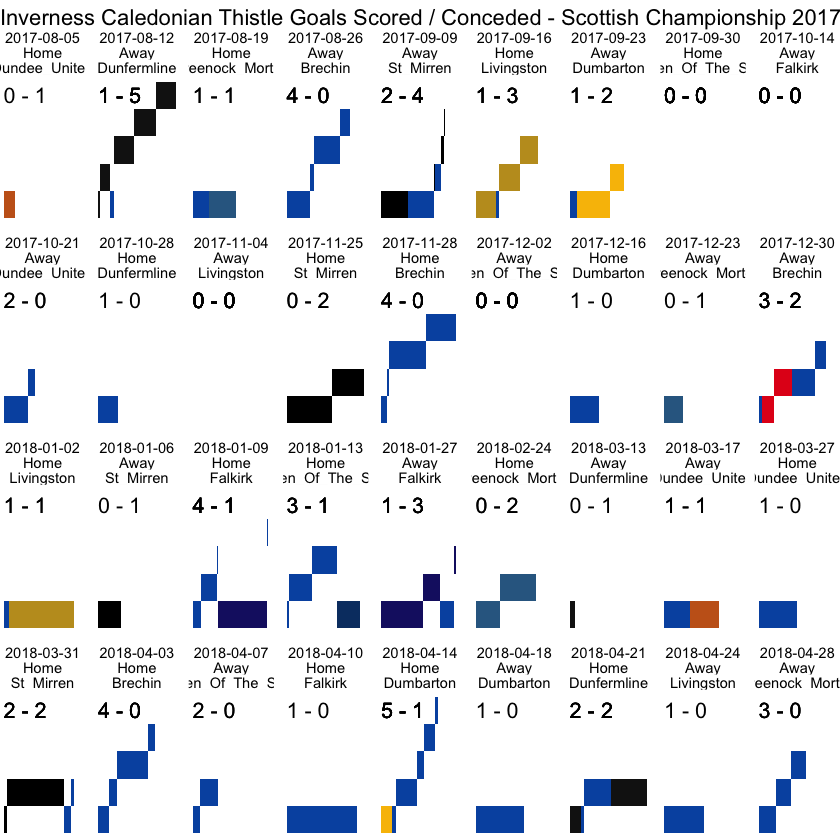

In [23]:
devtools::install_github('thomasp85/gganimate')

library(gganimate)

#we already defined p as our original season plot
# but we will rebuild it here  just in case you have removed it from your workspace
p <- ggplot(plot_data,aes(time,goalcount, group = opponent, fill = team)) +
  geom_rect(aes(xmin = lag_time,xmax = time, ymin = (goalcount - 1), ymax = goalcount)) +
  geom_text(aes(x = 25,y = 4.5,label = result , size = 0.5)) +
theme_void() +
  scale_fill_manual(values = team_df$colors) +
  facet_wrap(date + inverness_status ~ opponent, ncol = 9) +
  ggtitle(label = "Inverness Caledonian Thistle Goals Scored / Conceded - Scottish Championship 2017/2018") +
  labs(x = NULL, y = NULL) +
  theme(legend.position = "none")
print(p)

In [25]:
# now we take the previous plot, and animate it using the game id to render each faceted plot, in date order

install.packages('gifski')

q <- p + transition_states(gameid, transition_length = 1, state_length = 1) + shadow_mark(past =  TRUE) # this ensures all previous plots are shown

animate(q,width = 900, height = 750)


The downloaded binary packages are in
	/var/folders/fn/10dyfg195751k6kfky4t_j7r0000gn/T//RtmppaSebP/downloaded_packages


Rendering [========>----------------------------------] at 0.33 fps ~ eta:  4mWarning message:
“Removed 10 rows containing missing values (geom_rect).”Warning message:
“Removed 10 rows containing missing values (geom_rect).”Warning message:
Rendering [=========>---------------------------------] at 0.33 fps ~ eta:  4mWarning message:
“Removed 20 rows containing missing values (geom_rect).”Warning message:
Rendering [==========>--------------------------------] at 0.33 fps ~ eta:  4mWarning message:
“Removed 20 rows containing missing values (geom_rect).”Warning message:
Rendering [===========>-------------------------------] at 0.33 fps ~ eta:  4mWarning message:
“Removed 20 rows containing missing values (geom_rect).”Warning message:
“Removed 20 rows containing missing values (geom_rect).”Warning message:
Rendering [============>------------------------------] at 0.33 fps ~ eta:  4mWarning message:
Rendering [============>------------------------------] at 0.33 fps ~ eta:  3mWarning m

In [26]:
anim_save("Game_by_Game_Season_plot.gif")